## Them cac thu vien ho tro

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Xem du lieu ban dau

In [2]:
data = pd.read_csv('crop_yield.csv')

In [3]:
data.head(10)

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251
5,South,Silt,Soybean,797.471182,37.704974,False,True,Rainy,74,5.898416
6,West,Clay,Wheat,357.902357,31.593431,False,False,Rainy,90,2.652392
7,South,Sandy,Rice,441.131154,30.887107,True,True,Sunny,61,5.829542
8,North,Silt,Wheat,181.587861,26.752729,True,False,Sunny,127,2.943716
9,West,Sandy,Wheat,395.048968,17.646199,False,True,Rainy,140,3.707293


In [4]:
data.shape

(999, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Region                  999 non-null    object 
 1   Soil_Type               999 non-null    object 
 2   Crop                    999 non-null    object 
 3   Rainfall_mm             999 non-null    float64
 4   Temperature_Celsius     999 non-null    float64
 5   Fertilizer_Used         999 non-null    bool   
 6   Irrigation_Used         999 non-null    bool   
 7   Weather_Condition       999 non-null    object 
 8   Days_to_Harvest         999 non-null    int64  
 9   Yield_tons_per_hectare  999 non-null    float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 64.5+ KB


In [6]:
data.describe()

,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Yield_tons_per_hectare
count,999.000000,999.000000,999.000000,999.000000
mean,545.612700,27.391356,104.439439,4.648331
std,258.326683,7.210630,26.681264,1.699106
min,100.105325,15.034366,60.000000,-0.007103
25%,317.846295,21.333747,80.000000,3.437776
50%,550.073349,27.442497,103.000000,4.713049
75%,773.239865,33.663420,128.500000,5.900547
max,999.639444,39.997860,149.000000,9.136935


## Truc quan hoa va tien xu ly du lieu

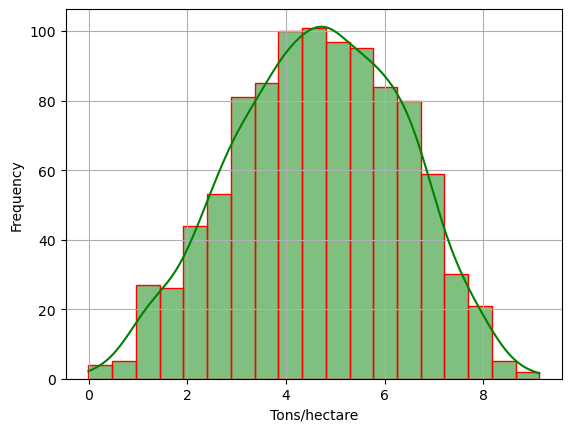

In [7]:
sns.histplot(data = data, x = "Yield_tons_per_hectare",kde = True, color = 'green',edgecolor='red')
plt.xlabel('Tons/hectare')
plt.ylabel('Frequency')
plt.grid(True)

## Truc quan hoa bien roi rac

In [8]:
columns = ['Region','Soil_Type','Crop','Fertilizer_Used','Irrigation_Used','Weather_Condition']
for column in columns:
    print(column,":",data[column].unique())

Region : ['West' 'South' 'North' 'East']
Soil_Type : ['Sandy' 'Clay' 'Loam' 'Silt' 'Peaty' 'Chalky']
Crop : ['Cotton' 'Rice' 'Barley' 'Soybean' 'Wheat' 'Maize']
Fertilizer_Used : [False  True]
Irrigation_Used : [ True False]
Weather_Condition : ['Cloudy' 'Rainy' 'Sunny']


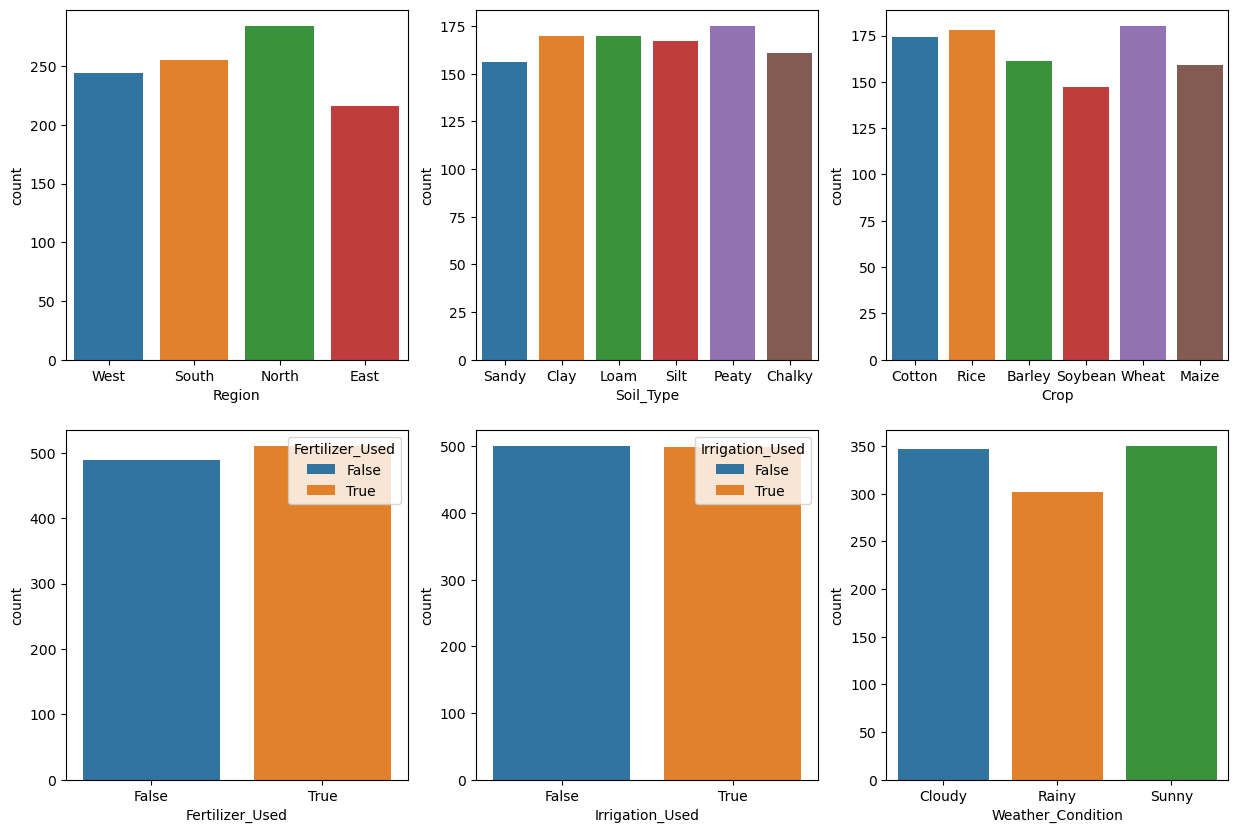

In [9]:
fig,axes = plt.subplots(2,3,figsize= (15,10))
sns.countplot(ax = axes[0,0], data = data, x='Region',hue='Region')
sns.countplot(ax = axes[0,1], data = data, x = "Soil_Type",hue='Soil_Type')
sns.countplot(ax = axes[0,2], data = data, x = "Crop",hue='Crop')
sns.countplot(ax = axes[1,0], data = data, x = "Fertilizer_Used",hue='Fertilizer_Used')
sns.countplot(ax = axes[1,1], data = data, x = "Irrigation_Used",hue='Irrigation_Used')
sns.countplot(ax = axes[1,2], data = data, x = "Weather_Condition",hue='Weather_Condition')
plt.show();

## Trực quan hóa sự tương quan giữa các biến rời rạc với biến mục tiêu

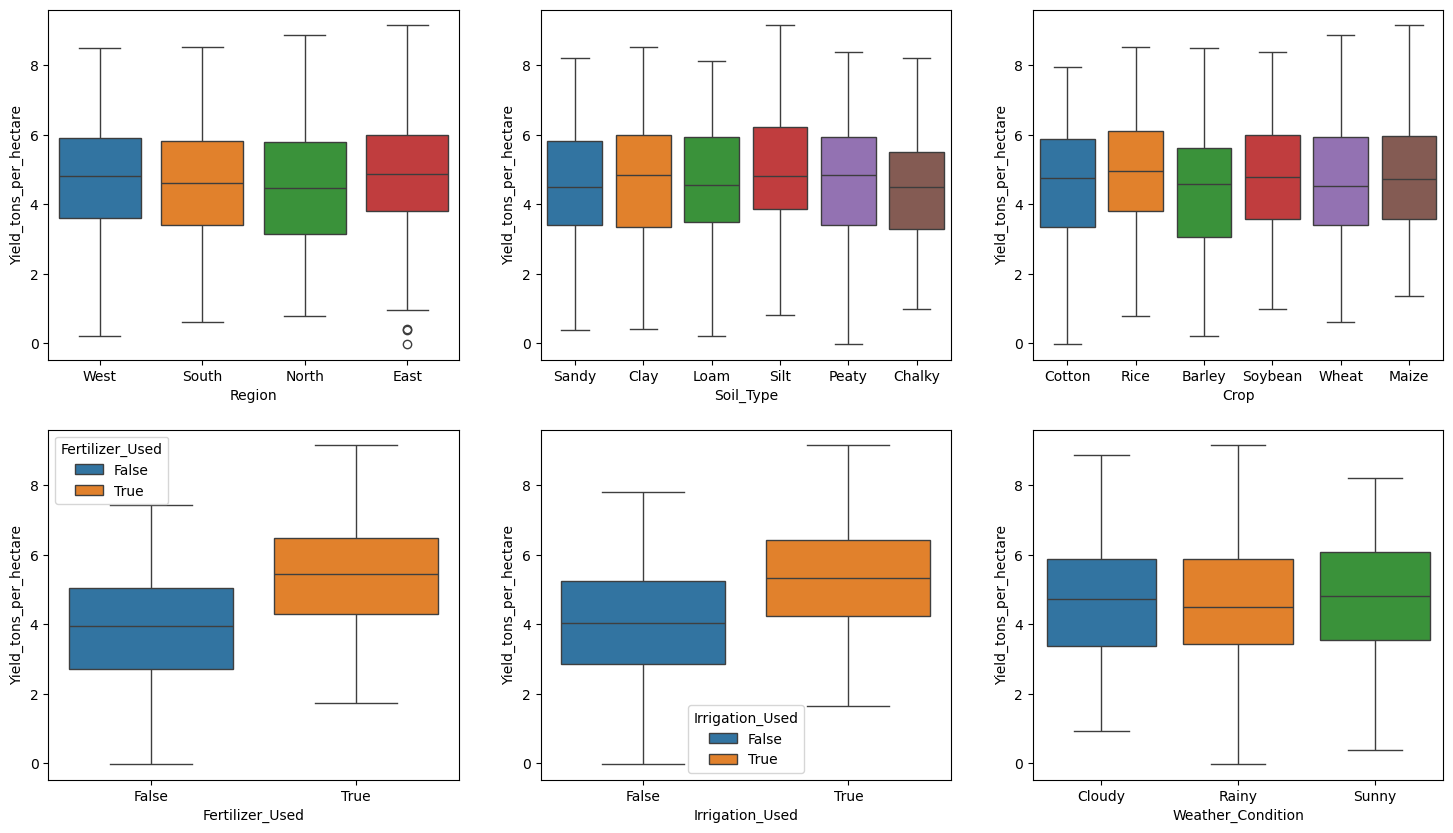

In [10]:
fig,axes = plt.subplots(2,3,figsize= (18,10))
sns.boxplot(ax = axes[0,0],data=data, x='Region', y='Yield_tons_per_hectare', hue='Region')
sns.boxplot(ax = axes[0,1], data = data, x = "Soil_Type", y='Yield_tons_per_hectare' ,hue = "Soil_Type")
sns.boxplot(ax = axes[0,2], data = data, x = "Crop", y='Yield_tons_per_hectare',hue = "Crop")
sns.boxplot(ax = axes[1,0], data = data, x = "Fertilizer_Used", y='Yield_tons_per_hectare',hue = "Fertilizer_Used")
sns.boxplot(ax = axes[1,1], data = data, x = "Irrigation_Used", y='Yield_tons_per_hectare',hue = "Irrigation_Used")
sns.boxplot(ax = axes[1,2], data = data, x = "Weather_Condition", y='Yield_tons_per_hectare',hue = "Weather_Condition")
plt.show()

## Truc quan hoa bien lien tuc

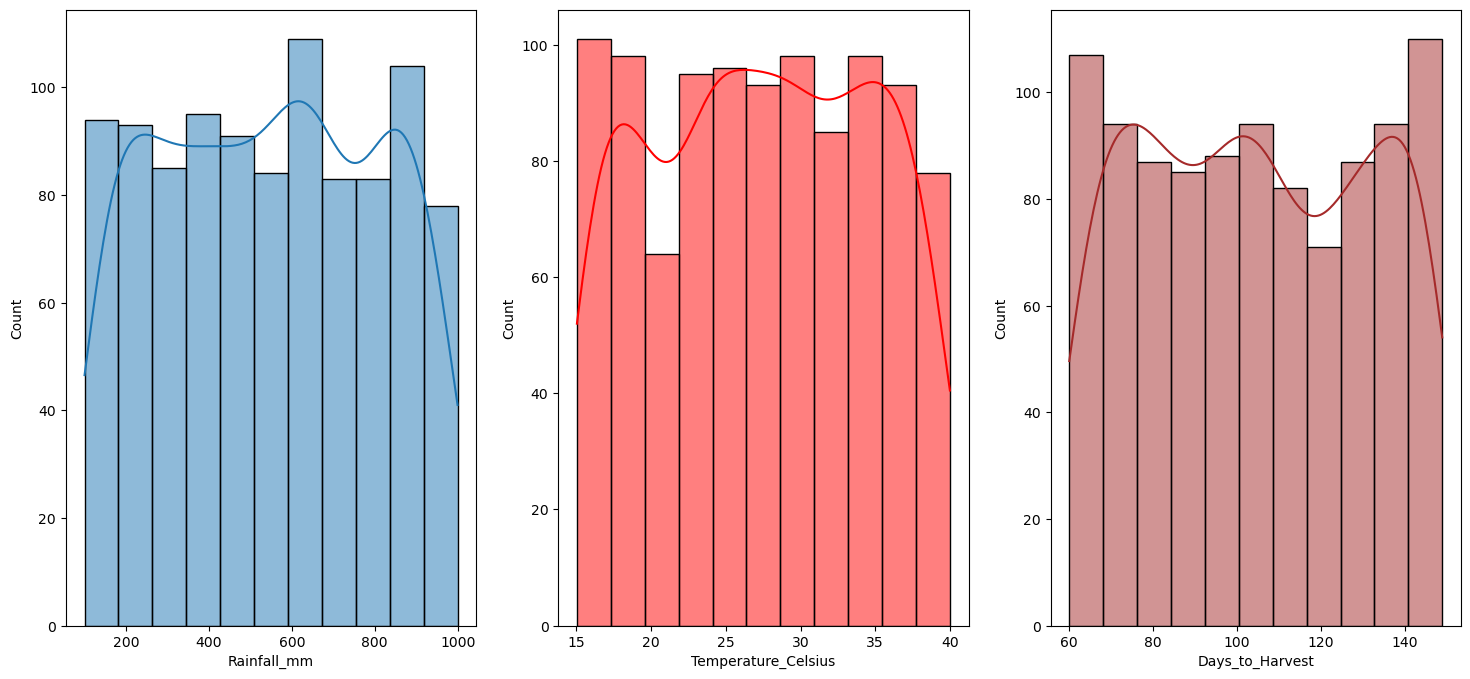

In [11]:
fig,axes = plt.subplots(1,3,figsize= (18,8))
sns.histplot(ax = axes[0], data = data, x = "Rainfall_mm",kde = True)
sns.histplot(ax = axes[1], data = data, x = "Temperature_Celsius",kde = True,color = 'red')
sns.histplot(ax = axes[2], data = data, x = "Days_to_Harvest",kde = True,color = 'brown')
plt.show()

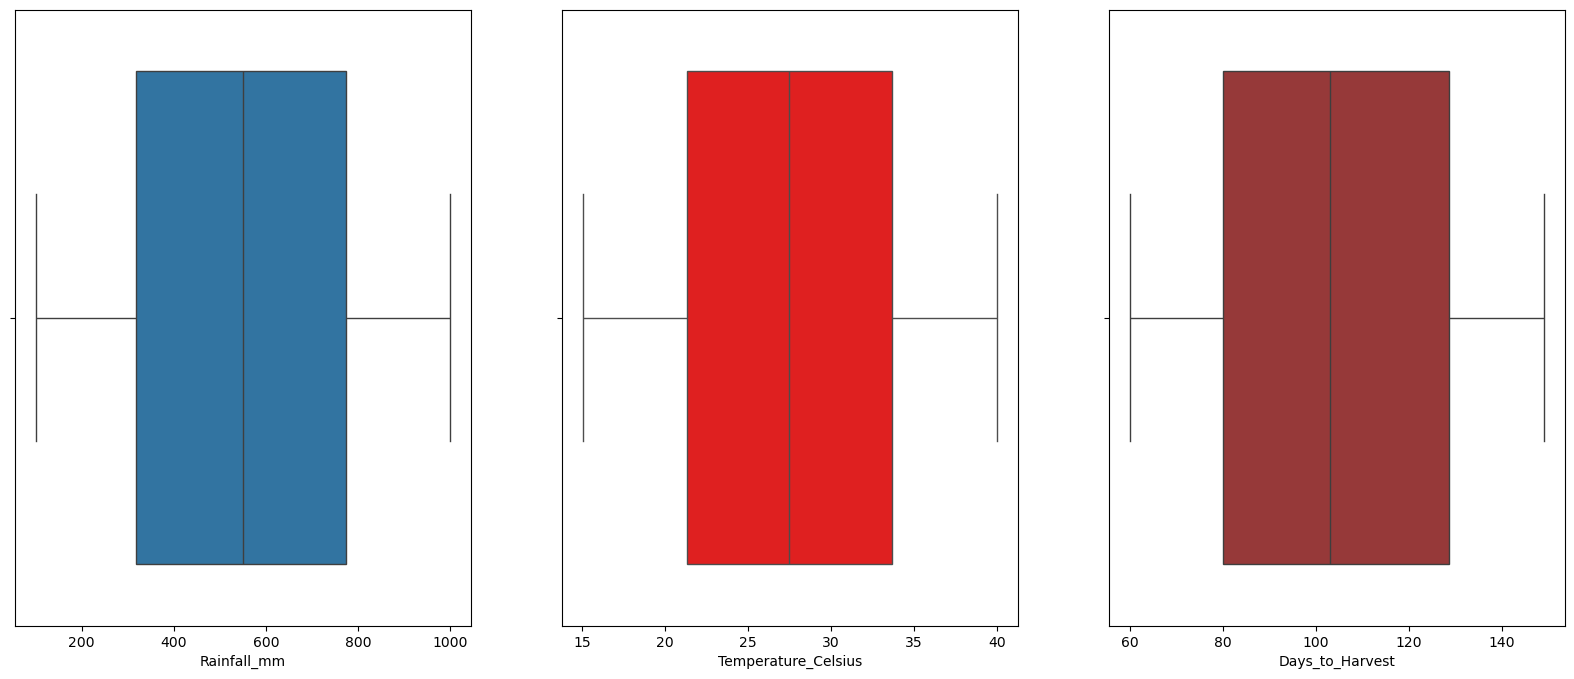

In [12]:
fig,axes = plt.subplots(1,3,figsize= (20,8))
sns.boxplot(ax = axes[0], data = data, x = "Rainfall_mm")
sns.boxplot(ax = axes[1], data = data, x = "Temperature_Celsius",color='red')
sns.boxplot(ax = axes[2], data = data, x = "Days_to_Harvest",color='brown')
plt.show()

## Trực quan hóa sự tương quan giữa các biến liên tục với biến mục tiêu

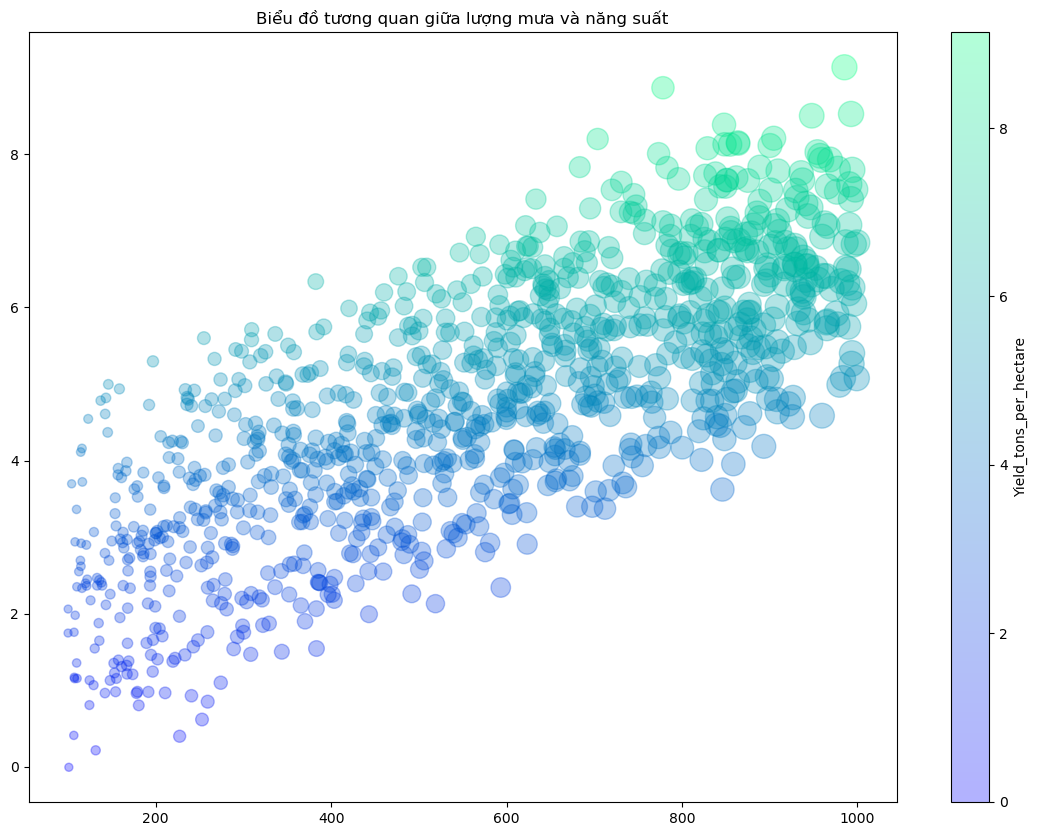

In [13]:
plt.figure(figsize=(14,10))
hectare,rainfall = data['Yield_tons_per_hectare'],data['Rainfall_mm']
plt.scatter(data = data, x = "Rainfall_mm",y='Yield_tons_per_hectare',c=hectare, s=rainfall/3,alpha=0.3,cmap='winter')
plt.colorbar(label='Yield_tons_per_hectare')
plt.title('Biểu đồ tương quan giữa lượng mưa và năng suất')
plt.show();

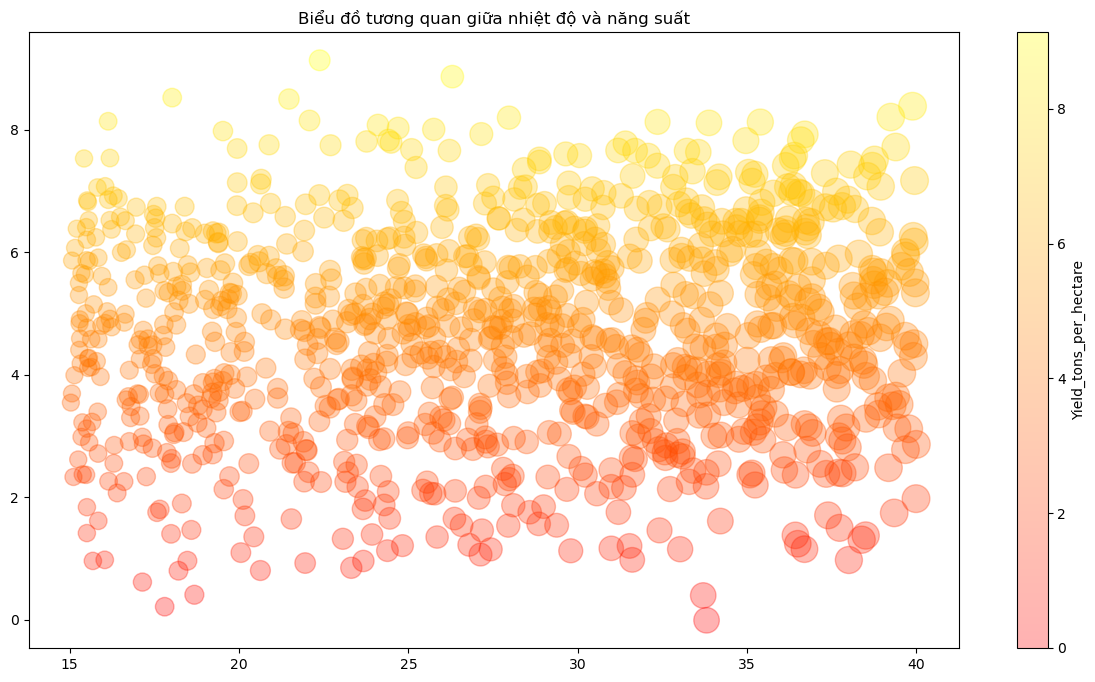

In [14]:
plt.figure(figsize=(15,8))
hectare,temperature = data['Yield_tons_per_hectare'],data['Temperature_Celsius']
plt.scatter(data = data, x = "Temperature_Celsius",y='Yield_tons_per_hectare',c=hectare, s=temperature*10,alpha=0.3,cmap='autumn')
plt.colorbar(label='Yield_tons_per_hectare')
plt.title('Biểu đồ tương quan giữa nhiệt độ và năng suất')
plt.show();

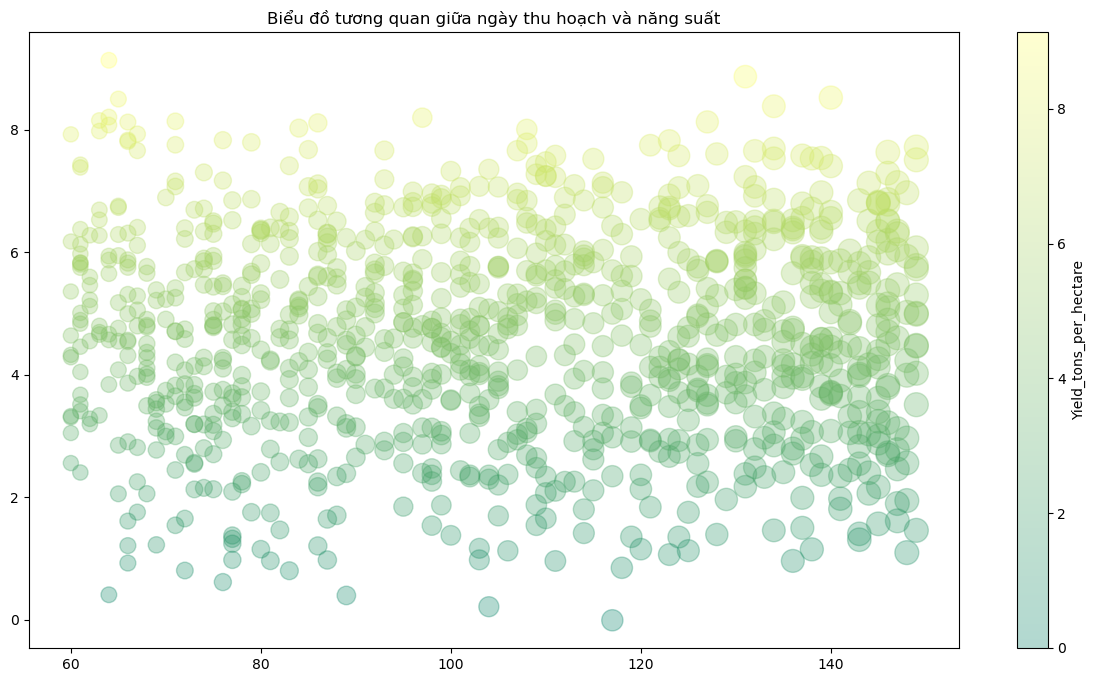

In [15]:
plt.figure(figsize=(15,8))
hectare,time = data['Yield_tons_per_hectare'],data['Days_to_Harvest']
plt.scatter(data = data, x = "Days_to_Harvest",y='Yield_tons_per_hectare',c=hectare, s=time*2,alpha=0.3,cmap='summer')
plt.colorbar(label='Yield_tons_per_hectare')
plt.title('Biểu đồ tương quan giữa ngày thu hoạch và năng suất')
plt.show();

## Tien xu ly du lieu

In [16]:
df = data.copy()

In [17]:
df.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


- Kiem tra du lieu thieu

In [18]:
df.isnull().sum()

Region                    0
Soil_Type                 0
Crop                      0
Rainfall_mm               0
Temperature_Celsius       0
Fertilizer_Used           0
Irrigation_Used           0
Weather_Condition         0
Days_to_Harvest           0
Yield_tons_per_hectare    0
dtype: int64

- Kiem tra du lieu trung lap

In [19]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
994    False
995    False
996    False
997    False
998    False
Length: 999, dtype: bool

* Chuyen doi kieu du lieu

In [20]:
columns = ['Region','Soil_Type','Crop','Fertilizer_Used','Irrigation_Used','Weather_Condition']
for column in columns:
    print(column,":",df[column].unique())

Region : ['West' 'South' 'North' 'East']
Soil_Type : ['Sandy' 'Clay' 'Loam' 'Silt' 'Peaty' 'Chalky']
Crop : ['Cotton' 'Rice' 'Barley' 'Soybean' 'Wheat' 'Maize']
Fertilizer_Used : [False  True]
Irrigation_Used : [ True False]
Weather_Condition : ['Cloudy' 'Rainy' 'Sunny']


In [21]:
columns_1 = ['Region','Soil_Type','Crop','Fertilizer_Used','Irrigation_Used','Weather_Condition']
for column in columns_1:
    df[column] = df[column].astype('category')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Region                  999 non-null    category
 1   Soil_Type               999 non-null    category
 2   Crop                    999 non-null    category
 3   Rainfall_mm             999 non-null    float64 
 4   Temperature_Celsius     999 non-null    float64 
 5   Fertilizer_Used         999 non-null    category
 6   Irrigation_Used         999 non-null    category
 7   Weather_Condition       999 non-null    category
 8   Days_to_Harvest         999 non-null    int64   
 9   Yield_tons_per_hectare  999 non-null    float64 
dtypes: category(6), float64(3), int64(1)
memory usage: 38.1 KB


* Ma hoa du lieu

In [23]:
df_change = {
    'Region': {'West':0,'South':1 ,'North':2 ,'East':3},
    'Soil_Type' : {'Sandy':0, 'Clay':1, 'Loam':2, 'Silt':3, 'Peaty':4, 'Chalky':5},
    'Crop' : {'Cotton':0, 'Rice':1, 'Barley':2, 'Soybean':3, 'Wheat':4, 'Maize':5},
    'Fertilizer_Used' : {True:1, False:0},
    'Irrigation_Used' : {True:1, False:0},
    'Weather_Condition' : {'Cloudy':0, 'Rainy':1, 'Sunny':2}
}

In [24]:
df = df.replace(df_change)

In [25]:
df.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,0,0,0,897.077239,27.676966,0,1,0,122,6.555816
1,1,1,1,992.673282,18.026142,1,1,1,140,8.527341
2,2,2,2,147.998025,29.794042,0,0,2,106,1.127443
3,2,0,3,986.866331,16.644190,0,1,1,146,6.517573
4,1,3,4,730.379174,31.620687,1,1,0,110,7.248251


## Chuan hoa du lieu

In [26]:
df['Rainfall_mm'] = (df['Rainfall_mm'] - df['Rainfall_mm'].mean())/df['Rainfall_mm'].std()
df['Temperature_Celsius'] = (df['Temperature_Celsius'] - df['Temperature_Celsius'].mean())/df['Temperature_Celsius'].std()
df['Days_to_Harvest'] = (df['Days_to_Harvest'] - df['Days_to_Harvest'].mean())/df['Days_to_Harvest'].std()

In [27]:
df.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,0,0,0,1.360543,0.039610,0,1,0,0.658161,6.555816
1,1,1,1,1.730602,-1.298807,1,1,1,1.332791,8.527341
2,2,2,2,-1.539193,0.333214,0,0,2,0.058489,1.127443
3,2,0,3,1.708123,-1.490461,0,1,1,1.557668,6.517573
4,1,3,4,0.715243,0.586541,1,1,0,0.208407,7.248251


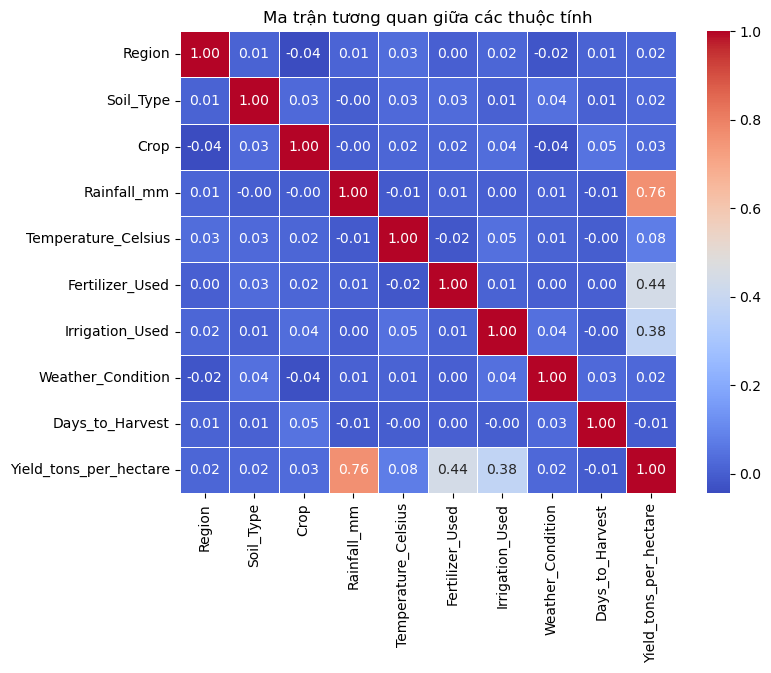

In [28]:
correlation_matrix_full = df.corr()

# Plot the full correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_full, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Ma trận tương quan giữa các thuộc tính")
plt.show()

# Display the correlation matrix as a DataFrame for detailed reference

## Phan tach du lieu

In [29]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [31]:
X_train.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest
778,1,3,4,0.620155,-0.449262,1,0,0,-1.590608
286,2,1,3,-0.678470,-1.469081,1,0,0,0.470763
165,2,1,2,0.594806,0.318457,0,1,0,0.095968
960,0,5,3,-1.666740,0.677456,1,1,0,0.620681
493,2,3,2,1.706867,-0.375805,1,0,2,-1.028416


In [32]:
X_train.shape

(799, 9)

In [33]:
X_test.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest
453,0,5,1,-0.914202,-0.175669,1,1,2,0.208407
793,2,5,4,0.229628,-1.374826,1,1,2,0.283366
209,0,3,4,0.809744,0.286959,0,0,1,-0.241347
309,1,5,1,0.502211,0.401157,0,0,2,-0.316306
740,3,0,0,-1.232129,0.875702,0,0,2,-0.578662


In [34]:
X_test.shape

(200, 9)

## Huan Luyen Mo Hinh

# Linear Regression

#### Su dung thu vien

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

LinearRegression()

In [36]:
slope = model_1.coef_       
intercept = model_1.intercept_ 

print("W", slope)
print("b:", intercept)

W [-1.13763443e-03  9.34270436e-04  8.80087302e-03  1.28637264e+00
  1.31832805e-01  1.46789387e+00  1.25098802e+00  1.64733207e-02
 -1.09692640e-02]
b: 3.237548813229879


In [37]:
y_pred_1 = model_1.predict(X_test)
mse_1 = mean_squared_error(y_test, y_pred_1)
r2_1 = r2_score(y_test, y_pred_1)

print("Mean Squared Error (MSE):", mse_1)
print("R-squared (R2):", r2_1)

Mean Squared Error (MSE): 0.2927334565116199
R-squared (R2): 0.8972618444321999


In [38]:
result = pd.DataFrame({'Test':y_test,'Predict':y_pred_1})

In [39]:
result.head(10)

,Test,Predict
453,5.709601,4.801400
793,6.617192,6.138009
209,3.932438,4.374140
309,3.797644,3.985215
740,0.398197,1.803900
578,6.536822,6.802090
895,6.114699,5.556622
545,7.193685,7.883945
436,7.064185,6.586306
678,6.300866,6.078295


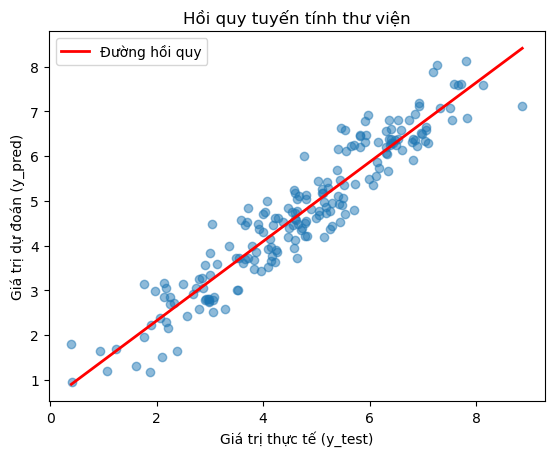

In [40]:
plt.scatter(y_test,y_pred_1,alpha=0.5)
slope, intercept = np.polyfit(y_test, y_pred_1, 1) 
x = np.linspace(min(y_test), max(y_test), 100)
y = slope * x + intercept
plt.plot(x, y, color="red", linewidth=2, label="Đường hồi quy")
plt.xlabel("Giá trị thực tế (y_test)")
plt.ylabel("Giá trị dự đoán (y_pred)")
plt.title("Hồi quy tuyến tính thư viện")
plt.legend()
plt.show()

### Tu code

In [41]:
feature_train = X_train
label = np.array(y_train).reshape(799,1)

In [42]:
N = len(feature_train)

In [43]:
dt = np.hstack([feature_train,np.ones((N,1))])

In [44]:
lr = 0.01
theta = np.array([[0.049],[-0.34],[0.25],[0.42],[0.023],[0.031],[0.27],[-0.04],[0.54],[-0.13]])
losses = []

In [45]:
epoch = 900
for e in range (epoch):
    x = dt
    y = label
    y_hat = x.dot(theta)
    loss = (y_hat-y)*(y_hat-y)
    losses.append(np.mean(loss))
    
    k = 2*(y_hat-y)
    dtheta = (x.T.dot(k))/N

    theta = theta-lr*(dtheta)

In [46]:
print(theta)

[[ 0.06822882]
 [ 0.03867315]
 [ 0.05025806]
 [ 1.28241278]
 [ 0.12212418]
 [ 1.58332361]
 [ 1.36028171]
 [ 0.09332277]
 [-0.01294829]
 [ 2.6994408 ]]


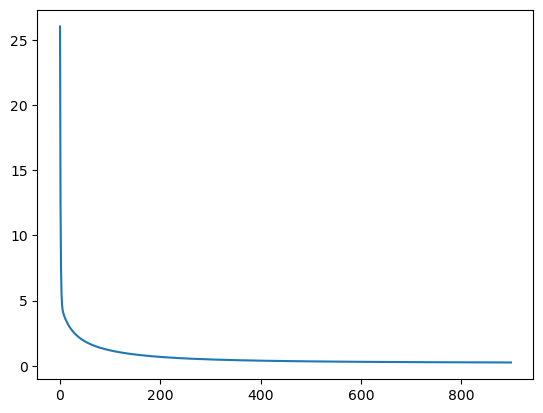

In [47]:
plt.plot(losses)
plt.show()

In [48]:
losses[-1]

0.2592139475099556

In [49]:
feature_test = X_test
M = len(feature_test)
dt_test = np.hstack([feature_test,np.ones((M,1))])

In [50]:
y_pred_1_code = dt_test.dot(theta)

In [51]:
result_df = pd.DataFrame({'y_test':y_test,'y_pred':y_pred_1_code.reshape(200,)})

In [52]:
result_df.head(10)

,y_test,y_pred
453,5.709601,4.876779
793,6.617192,6.483457
209,3.932438,4.186412
309,3.797644,3.895067
740,0.398197,1.625112
578,6.536822,6.727680
895,6.114699,5.600952
545,7.193685,8.102009
436,7.064185,6.456480
678,6.300866,5.930146


In [53]:
def r2_score(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred.reshape(200,)) ** 2)
    return 1 - (ss_residual / ss_total)
r2_code = r2_score(y_test, y_pred_1_code)
print("R-squared (R2):", r2_code)

R-squared (R2): 0.8880279545697285


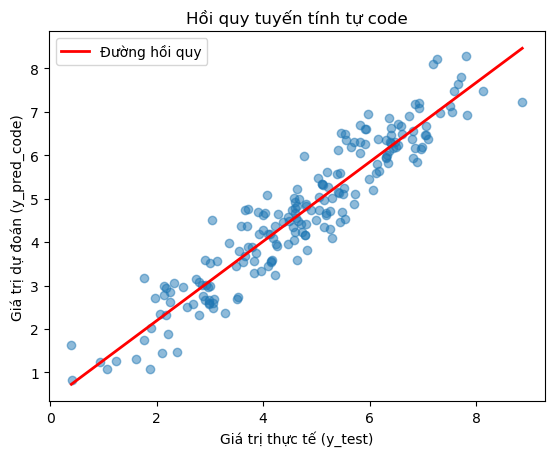

In [54]:
plt.scatter(y_test,y_pred_1_code,alpha=0.5)
slope, intercept = np.polyfit(y_test, y_pred_1_code, 1) 
x = np.linspace(min(y_test), max(y_test), 100)
y = slope * x + intercept
plt.plot(x, y, color="red", linewidth=2, label="Đường hồi quy")
plt.xlabel("Giá trị thực tế (y_test)")
plt.ylabel("Giá trị dự đoán (y_pred_code)")
plt.title("Hồi quy tuyến tính tự code")
plt.legend()
plt.show()

# Decision Tree Regression

## Su dung thu vien

In [55]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [56]:
model_2 = DecisionTreeRegressor(max_depth=5)

In [57]:
model_2.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5)

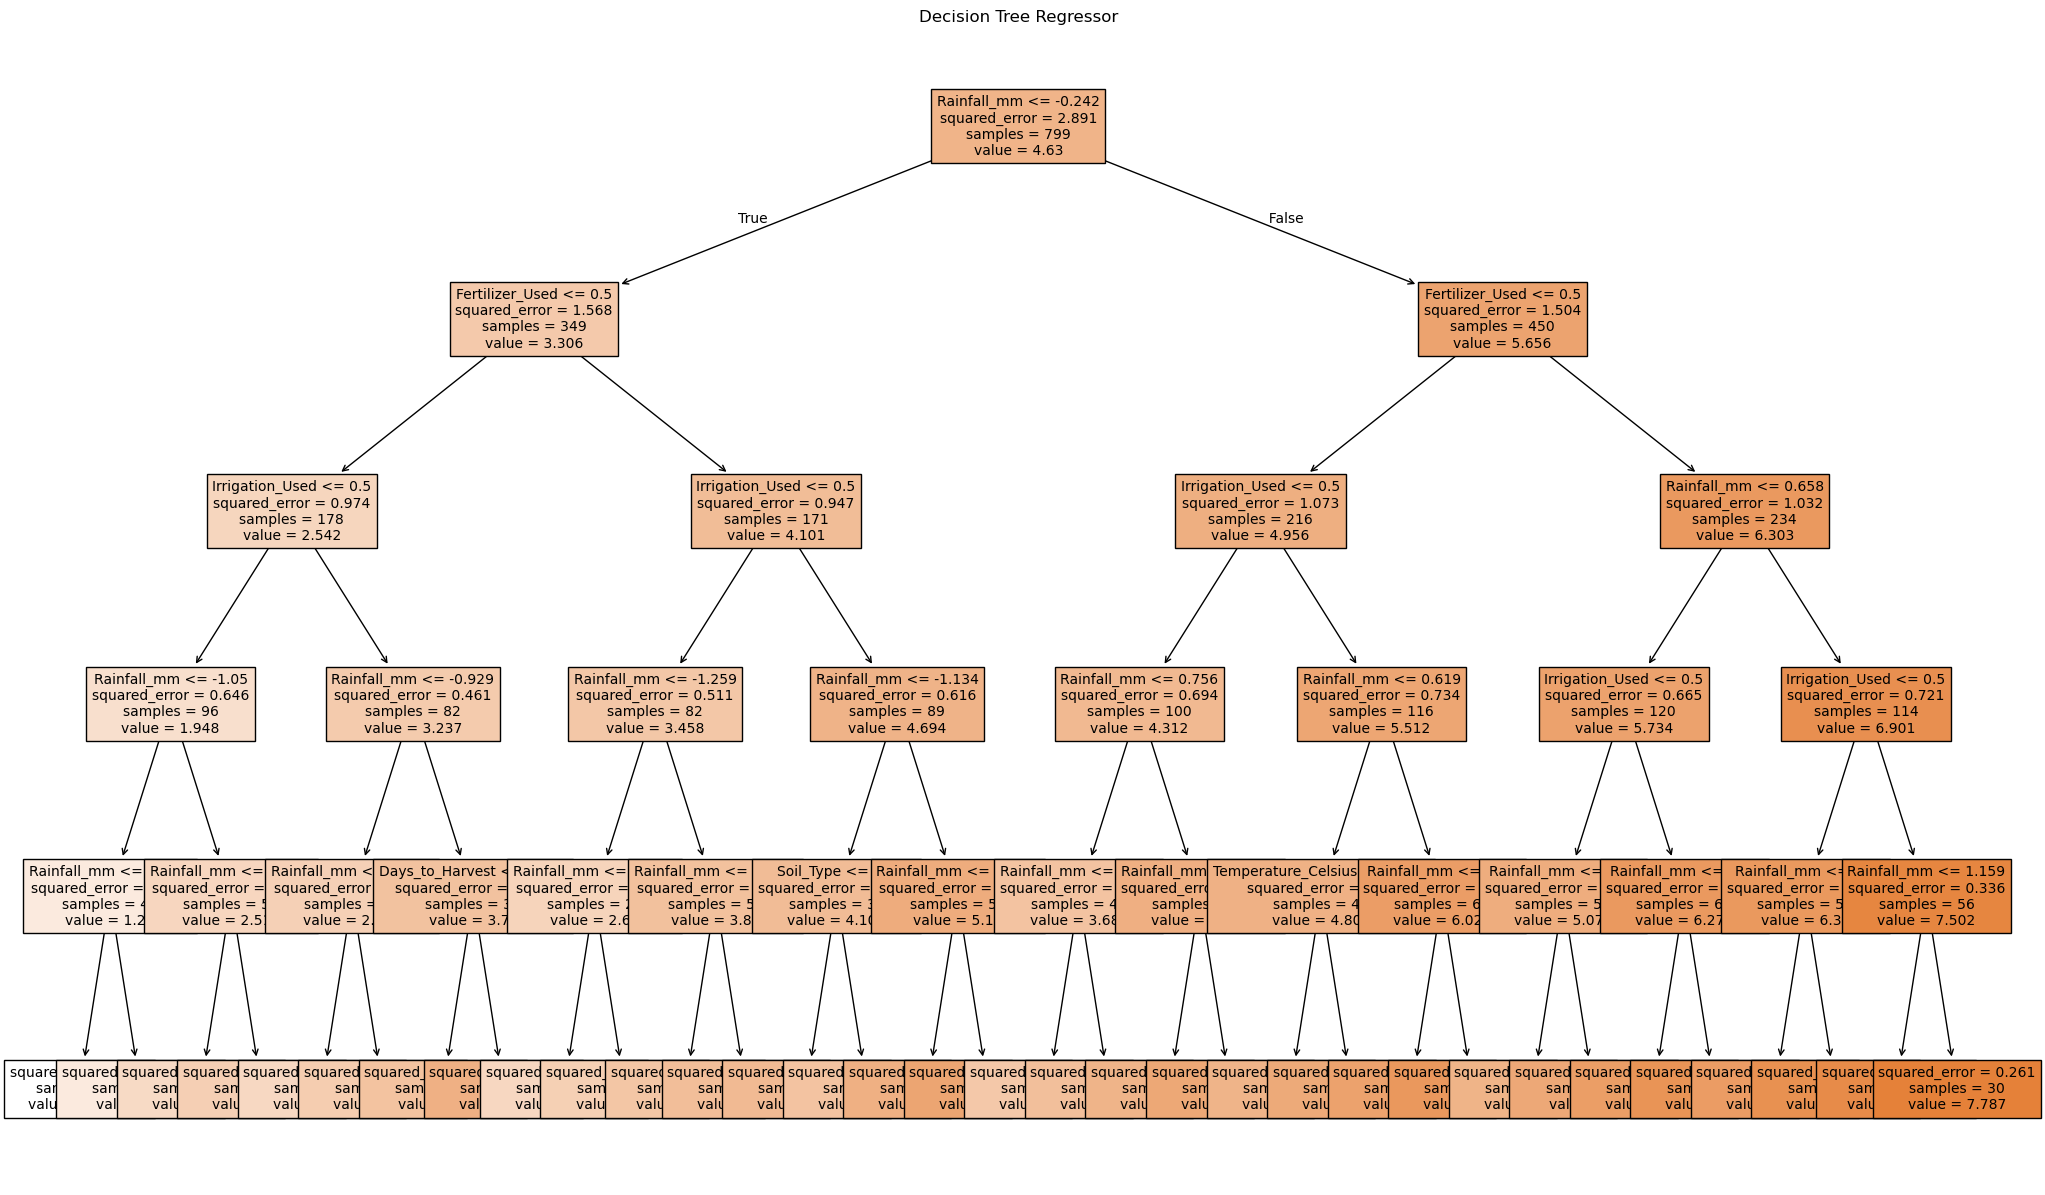

In [58]:
plt.figure(figsize=(25, 15))
plot_tree(model_2, feature_names=X_train.columns, filled=True, fontsize=10)
plt.title("Decision Tree Regressor")
plt.show()

In [59]:
y_pred_2 = model_2.predict(X_test)

In [60]:
result_df_2 = pd.DataFrame({'y_test':y_test,'y_pred':y_pred_2.reshape(200,)})

In [61]:
result_df_2.head(10)

,y_test,y_pred
453,5.709601,4.859372
793,6.617192,6.003401
209,3.932438,4.649307
309,3.797644,3.925197
740,0.398197,1.309631
578,6.536822,6.823487
895,6.114699,5.737071
545,7.193685,7.787413
436,7.064185,6.366572
678,6.300866,6.366572


In [62]:
mse_2 = mean_squared_error(y_test, y_pred_2)
r2_2 = r2_score(y_test, y_pred_2)

print("Mean Squared Error (MSE):", mse_2)
print("R-squared (R2):", r2_2)

Mean Squared Error (MSE): 0.36638845049855645
R-squared (R2): 0.8714117816455609


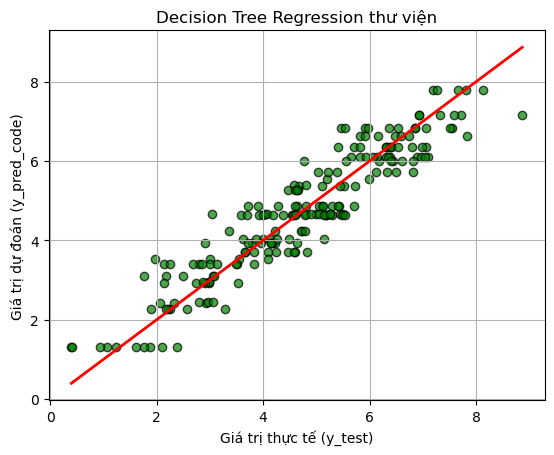

In [63]:
plt.scatter(y_test, y_pred_2, color="green", edgecolor="k", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", lw=2)
plt.title("Decision Tree Regression thư viện")
plt.xlabel("Giá trị thực tế (y_test)")
plt.ylabel("Giá trị dự đoán (y_pred_code)")
plt.grid(True)
plt.show()

## Tu Code

In [64]:
for column in X_train.columns:
    X_train[column] = X_train[column].astype('float64')

In [65]:
for column in X_test.columns:
    X_test[column] = X_test[column].astype('float64')

In [66]:
class DecisionTreeRegressor:
        
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def _split(self, X, y):
        best_split = {'feature': None, 'threshold': None, 'mse': float('inf')}
        for feature in X.columns:
            thresholds = X[feature].unique()
            for threshold in thresholds:
                left_mask = X[feature] <= threshold
                right_mask = X[feature] > threshold
                left_y, right_y = y[left_mask], y[right_mask]
                mse = (len(left_y) * np.var(left_y) + len(right_y) * np.var(right_y)) / len(y)
                if mse < best_split['mse']:
                    best_split = {'feature': feature, 'threshold': threshold, 'mse': mse}
        return best_split

    def _build_tree(self, X, y, depth):
        if len(y) == 0 or (self.max_depth and depth >= self.max_depth):
            return {'value': y.mean()}
        split = self._split(X, y)
        if split['feature'] is None:
            return {'value': y.mean()}

        left_mask = X[split['feature']] <= split['threshold']
        right_mask = X[split['feature']] > split['threshold']
        left_tree = self._build_tree(X[left_mask], y[left_mask], depth + 1)
        right_tree = self._build_tree(X[right_mask], y[right_mask], depth + 1)

        return {
            'feature': split['feature'],
            'threshold': split['threshold'],
            'left': left_tree,
            'right': right_tree
        }

    def fit(self, X, y):
        self.tree = self._build_tree(X, y, 0)

    def _predict_one(self, x, tree):
        if 'value' in tree:
            return tree['value']
        if x[tree['feature']] <= tree['threshold']:
            return self._predict_one(x, tree['left'])
        else:
            return self._predict_one(x, tree['right'])

    def predict(self, X):
        return np.array([self._predict_one(x, self.tree) for _, x in X.iterrows()])

In [67]:
model_2_code = DecisionTreeRegressor(max_depth=5)
model_2_code.fit(X_train, y_train)

In [68]:
# 5. Make predictions
y_pred_2_code = model_2_code.predict(X_test)

In [69]:
result_df_2_code = result_df_2 = pd.DataFrame({'y_test':y_test,'y_pred':y_pred_2_code.reshape(200,)})

In [70]:
result_df_2_code.head(10)

,y_test,y_pred
453,5.709601,4.859372
793,6.617192,6.003401
209,3.932438,4.649307
309,3.797644,3.925197
740,0.398197,1.309631
578,6.536822,6.823487
895,6.114699,5.737071
545,7.193685,7.787413
436,7.064185,6.366572
678,6.300866,6.366572


In [71]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def r2_score(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

mse = mean_squared_error(y_test, y_pred_2_code)
r2 = r2_score(y_test, y_pred_2_code)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 0.3790079176339982
R-squared (R2): 0.8669828352818838


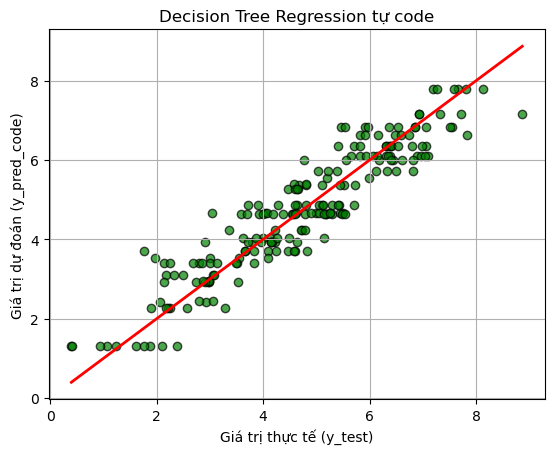

In [72]:
plt.scatter(y_test, y_pred_2_code, color="green", edgecolor="k", alpha=0.7)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", lw=2)
plt.title("Decision Tree Regression tự code")
plt.xlabel("Giá trị thực tế (y_test)")
plt.ylabel("Giá trị dự đoán (y_pred_code)")
plt.grid(True)
plt.show()